Juan Andres Sañudo
Maria J. Ostos
Cristian Florez




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.signal import welch, butter, filtfilt
from numpy import hanning
import scipy.io as sio
import scipy.signal as sp
import os

4.1 Cree una señal que sea la suma de tres componentes sinusoidales con frecuencias de 40, 80 y 160 Hz. Defina la frecuencia de muestreo mínima necesaria para representar la señal, y utilice la frecuencia de muestreo necesaria para representarla apropiadamente

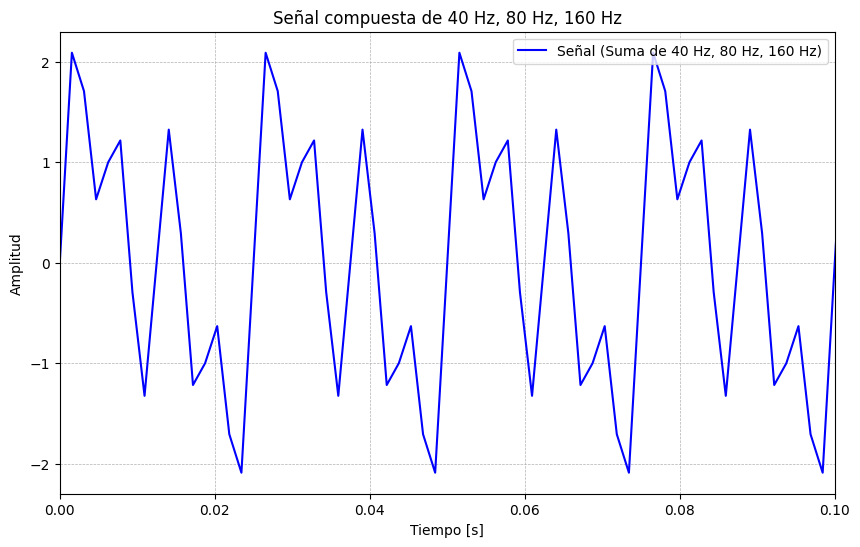

Frecuencia de muestreo mínima: 320 Hz
Frecuencia de muestreo utilizada: 640 Hz


In [3]:
#frecuancias
f1 = 40  # Hz
f2 = 80  # Hz
f3 = 160 # Hz

frecuencia_max = max(f1, f2, f3)
frecuencia_muestreo_min = 2 * frecuencia_max
frecuencia_muestreo = 4 * frecuencia_max
duracion = 1  # segundos
t = np.linspace(0, duracion, int(frecuencia_muestreo * duracion), endpoint=False)
#señal con las tres componentes
señal = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t) + np.sin(2 * np.pi * f3 * t)

#graficar
plt.figure(figsize=(10, 6))
plt.plot(t, señal, label="Señal (Suma de 40 Hz, 80 Hz, 160 Hz)", color='b')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Señal compuesta de 40 Hz, 80 Hz, 160 Hz')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.xlim(0, 0.1)
plt.show()

print(f"Frecuencia de muestreo mínima: {frecuencia_muestreo_min} Hz")
print(f"Frecuencia de muestreo utilizada: {frecuencia_muestreo} Hz")


4.2 Calcule la transformada de Fourier de la señal y grafique el espectro de frecuencia. Identifique en el espectro las frecuencias que componen la señal (trabaje con 10 periodos de la señal). [1]


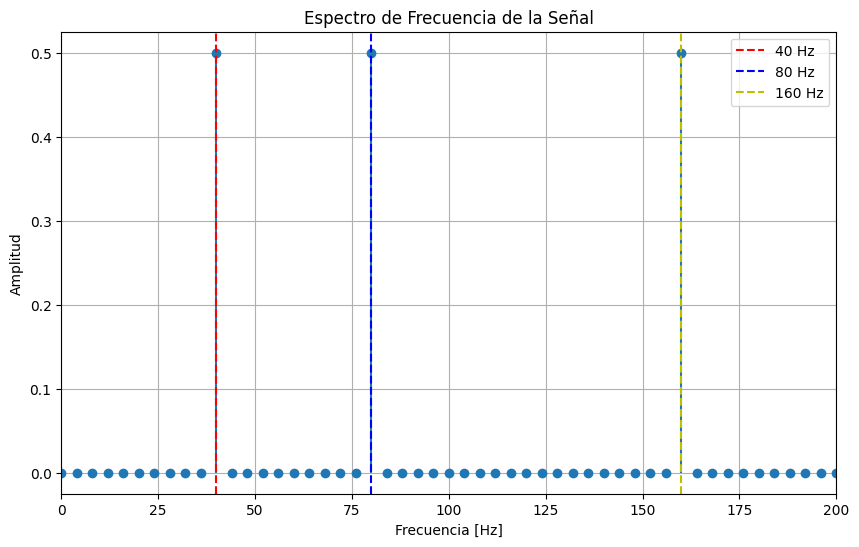

Frecuencias presentes identificadas en el espectro (40 Hz, 80 Hz, 160 Hz)


In [37]:
duracion = 10 / f1  #10 periodos
t = np.linspace(0, duracion, int(frecuencia_muestreo * duracion), endpoint=False)
señal = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t) + np.sin(2 * np.pi * f3 * t)

fft_señal = np.fft.fft(señal)
frecuencias = np.fft.fftfreq(len(señal), 1 / frecuencia_muestreo)
fft_amplitud = np.abs(fft_señal) / len(señal)  # Normalización
frecuencias_positivas = frecuencias[:len(frecuencias)//2]
fft_amplitud_positiva = fft_amplitud[:len(fft_amplitud)//2]

# Graficar
plt.figure(figsize=(10, 6))
plt.stem(frecuencias_positivas, fft_amplitud_positiva, basefmt=" ")
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.title('Espectro de Frecuencia de la Señal')
plt.grid(True)
plt.xlim(0, 200)  # Mostrar hasta 200 Hz


for freq in [40, 80, 160]:
    if freq==40:
        colores="r"
    elif freq==80:
        colores="b"
    else:
        colores="y"
    plt.axvline(x=freq, color=colores, linestyle='--', label=f'{freq} Hz')

plt.legend()
plt.show()

print("Frecuencias presentes identificadas en el espectro (40 Hz, 80 Hz, 160 Hz)")


4.3 Consulte la función que permite realizar el cálculo de la transformada inversa de Fourier. Aplíquelo a la señal anterior. [2]

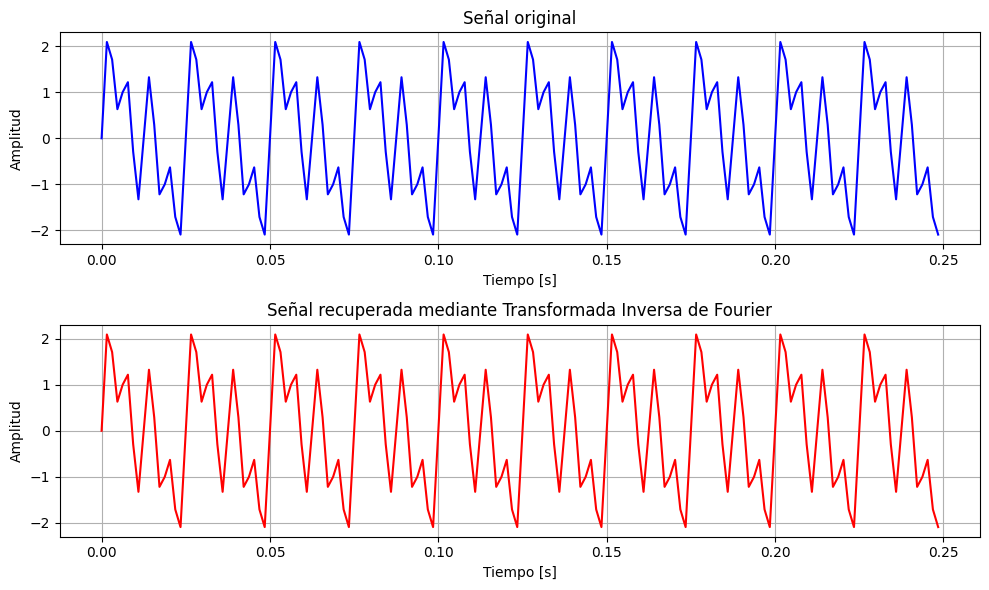

In [9]:

# Realizamos la Transformada Inversa de Fourier para recuperar la señal original
señal_recuperada = np.fft.ifft(fft_señal)

# Graficar la señal original y la señal recuperada
plt.figure(figsize=(10, 6))

# Señal original
plt.subplot(2, 1, 1)
plt.plot(t, señal, label="Señal original", color='b')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Señal original')
plt.grid(True)

# Señal recuperada
plt.subplot(2, 1, 2)
plt.plot(t, señal_recuperada.real, label="Señal recuperada", color='r')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Señal recuperada mediante Transformada Inversa de Fourier')
plt.grid(True)

plt.tight_layout()
plt.show()


4.4 ¿Podría decir que las siguientes líneas aplican un filtro? ¿Por qué?

Si, porque una segmentación en frecuencias es equivalente a aplicar un pasa bandas de la siguiente forma: F2[9:13] = F1[9:13];: Copia las amplitudes de frecuencia específicas (en este caso, las frecuencias de índice 9 a 12) de F1 a F2. Este paso es lo que se conoce como "segmentación en frecuencias", ya que selecciona y copia solo las componentes de frecuencia dentro de un rango específico. xr = np.fft.ifft(F2);: Calcula la transformada inversa de Fourier de F2, lo que produce una señal en el dominio del tiempo xr que contiene solo las componentes de frecuencia seleccionadas y filtradas. ax.plot(t, np.real(xr)): Finalmente, se grafica la parte real de la señal filtrada xr en función del tiempo t.

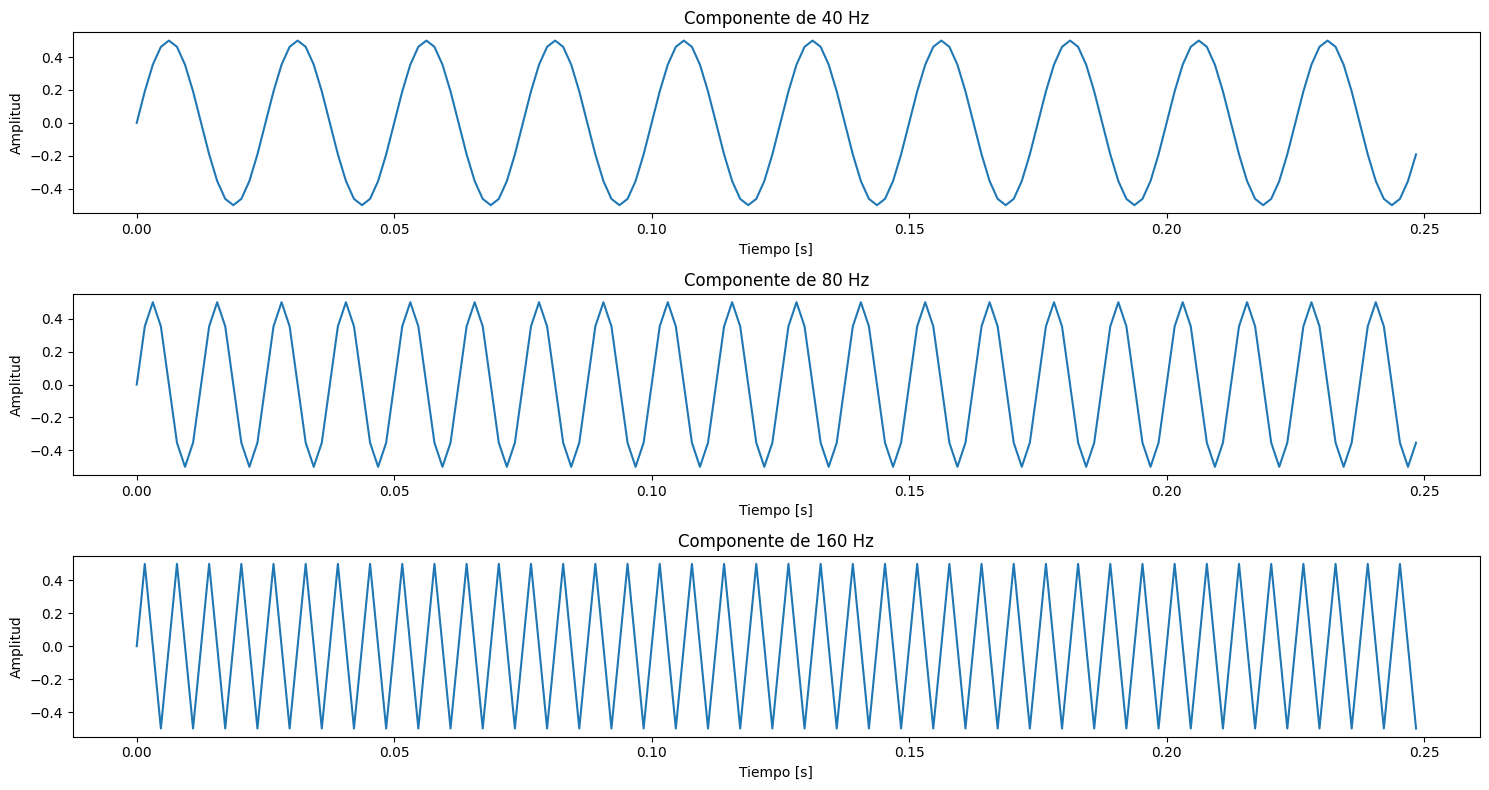

In [10]:
Xsenal = np.fft.fft(señal)
frecuencias = np.fft.fftfreq(len(t), 1/frecuencia_muestreo)

# Componentes vacías
comp1 = np.zeros(len(Xsenal), dtype=complex)
comp2 = np.zeros(len(Xsenal), dtype=complex)
comp3 = np.zeros(len(Xsenal), dtype=complex)

comp1[np.abs(frecuencias - f1) < 1] = Xsenal[np.abs(frecuencias - f1) < 1]
comp2[np.abs(frecuencias - f2) < 1] = Xsenal[np.abs(frecuencias - f2) < 1]
comp3[np.abs(frecuencias - f3) < 1] = Xsenal[np.abs(frecuencias - f3) < 1]

comps = [comp1, comp2, comp3]
frecuencias_componentes = [f1, f2, f3]

plt.figure(figsize=(15, 8))
for i in range(3):
    plt.subplot(3, 1, i+1)
    señal_reconstruida = np.fft.ifft(comps[i])
    plt.plot(t, np.real(señal_reconstruida))
    plt.title(f'Componente de {frecuencias_componentes[i]} Hz')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()


4.5 El archivo adjunto (senecg.mat) contiene una señal de ECG adquirida a una frecuencia de muestreo de 250 Hz. Realice un análisis en frecuencia de la señal usando periodograms de Welch y determine si es necesario eliminar ruido, en tal caso, elimínelo de la forma que se mostró antes y compruebe que lo haya realizado, calcule la transformada inversa de Fourier de la señal filtrada y compruebe con el periodograma. (Usar una ventana hanning, y justificar la elección del solapamiento y el ancho de la ventana)

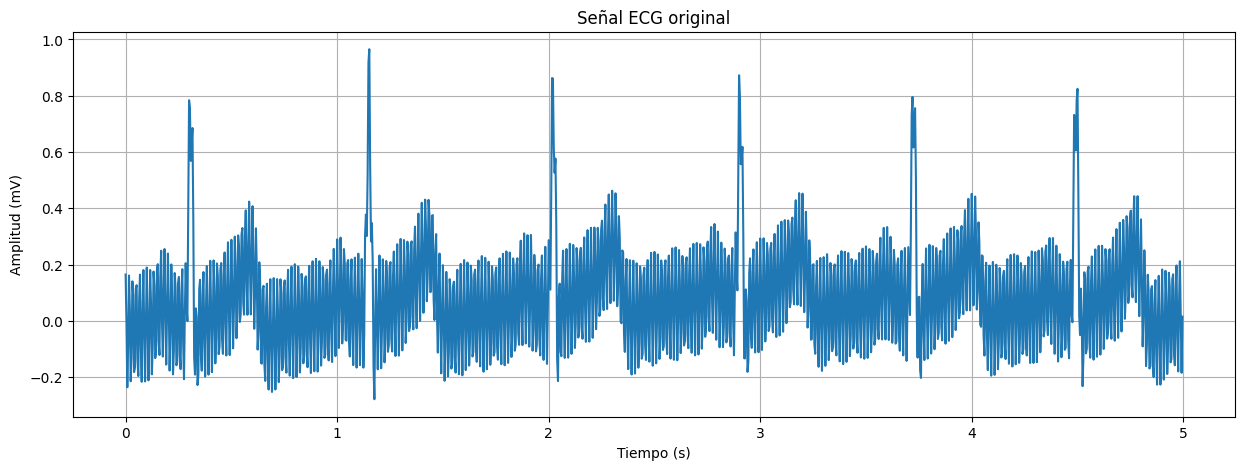

Forma de la señal ECG: (1250, 1)
Primeros valores de la señal ECG: [[ 0.16479384]
 [-0.00455636]
 [-0.23589197]
 [-0.083984  ]
 [ 0.16115376]
 [ 0.03975585]
 [-0.21464599]
 [-0.12484285]
 [ 0.14056194]
 [ 0.08944186]]


In [38]:
data = loadmat('senecg.mat')
ecg_signal = data['ECG']
fs = 250

plt.figure(figsize=(15, 5))
plt.plot(np.arange(0, len(ecg_signal) / fs, 1 / fs), ecg_signal)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.title('Señal ECG original')
plt.grid(True)
plt.show()
# Imprimir la forma de la señal para verificar su longitud
print("Forma de la señal ECG:", ecg_signal.shape)

# Imprimir los primeros valores de la señal para verificar su contenido
print("Primeros valores de la señal ECG:", ecg_signal[:10])




In [42]:

nperseg_value = min(len(ecg_signal), 512)
noverlap_value = nperseg_value // 2

f_welch, Pxx_welch = welch(ecg_signal.flatten(), fs=fs, window='hann', nperseg=nperseg_value, noverlap=noverlap_value)

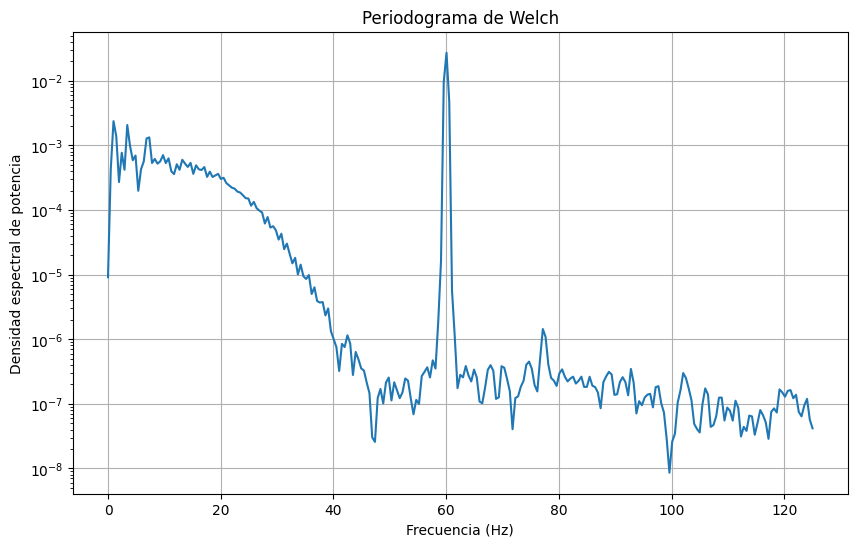

In [43]:
# Graficar el periodograma de Welch
plt.figure(figsize=(10, 6))
plt.semilogy(f_welch, Pxx_welch)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch')
plt.grid(True)
plt.show()

Las frecuencias que podríamos considerar como ruido en una señal de ECG suelen estar fuera del rango de frecuencias típicas de la actividad cardíaca, que es aproximadamente de 0.5 a 100 Hz. Por lo tanto, frecuencias extremadamente altas o bajas podrían considerarse como ruido en este contexto.

Por ejemplo, en el código que aplicamos anteriormente, el filtro pasabandas se diseñó para filtrar frecuencias fuera del rango de 8 a 12 Hz, lo cual sugiere que frecuencias fuera de este rango podrían considerarse como ruido en la señal de ECG

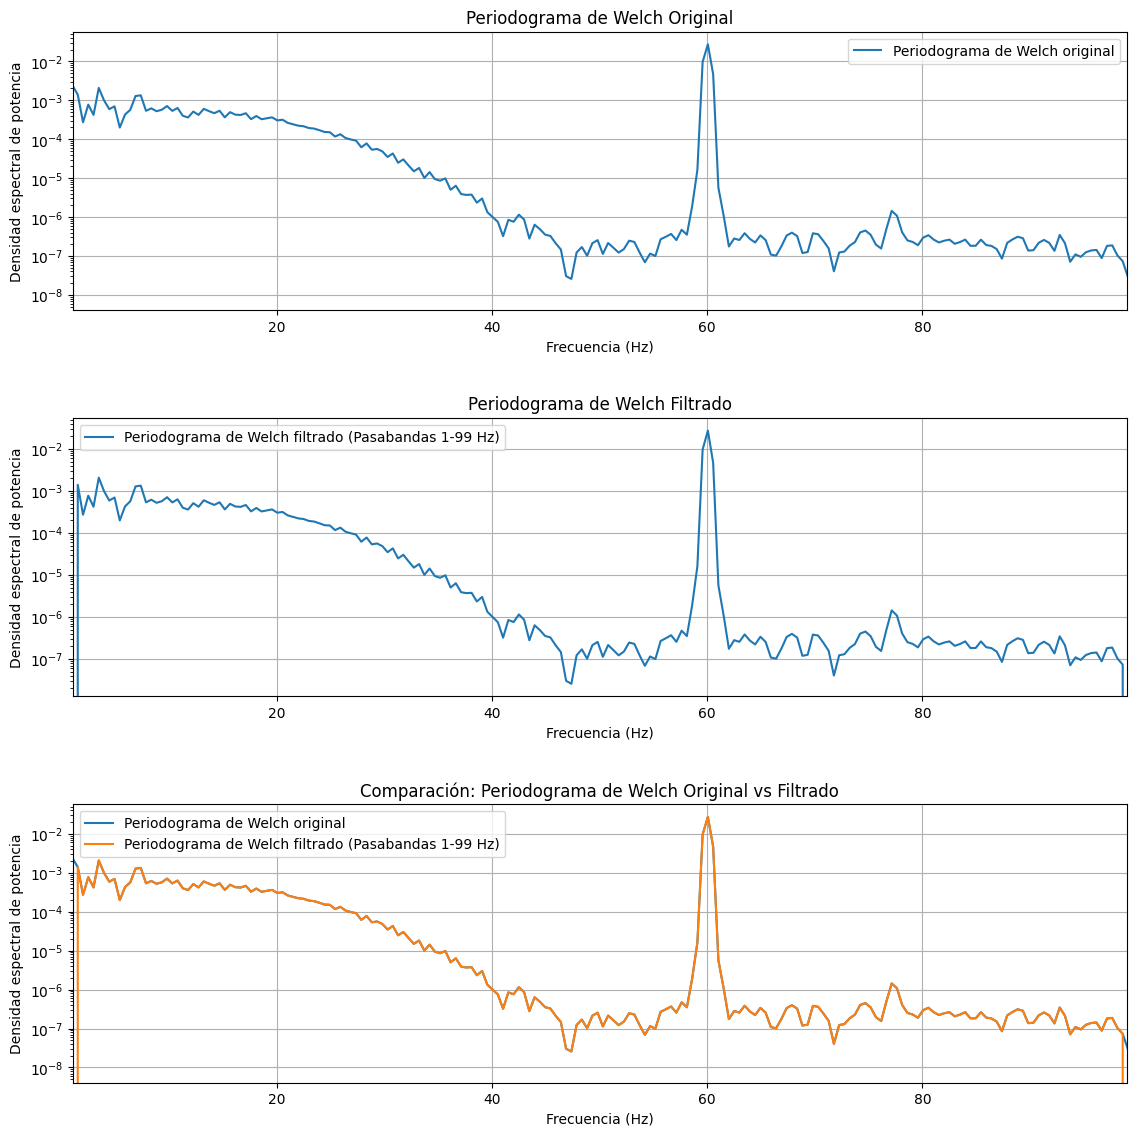

In [15]:
# Aplicar un filtro similar al del punto 4.4 al periodograma de Welch
filtered_Pxx_welch = Pxx_welch.copy()
filtered_Pxx_welch[(f_welch < 1) | (f_welch > 99)] = 0

# Graficar las tres señales en subgráficos separados
plt.figure(figsize=(12, 12))

# Gráfico 1: Periodograma de Welch original
plt.subplot(311)
plt.semilogy(f_welch, Pxx_welch, label='Periodograma de Welch original')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch Original')
plt.xlim(1, 99)  # Limitar el eje x de 1 a 99 Hz
plt.legend()
plt.grid(True)


plt.tight_layout(pad=3.0)

# Gráfico 2: Periodograma de Welch filtrado
plt.subplot(312)
plt.semilogy(f_welch, filtered_Pxx_welch, label='Periodograma de Welch filtrado (Pasabandas 1-99 Hz)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch Filtrado')
plt.xlim(1, 99)  # Limitar el eje x de 1 a 99 Hz
plt.legend()
plt.grid(True)


plt.tight_layout(pad=3.0)

# Gráfico 3: Comparación del periodograma de Welch original y filtrado
plt.subplot(313)
plt.semilogy(f_welch, Pxx_welch, label='Periodograma de Welch original')
plt.semilogy(f_welch, filtered_Pxx_welch, label='Periodograma de Welch filtrado (Pasabandas 1-99 Hz)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.title('Comparación: Periodograma de Welch Original vs Filtrado')
plt.xlim(1, 99)  # Limitar el eje x de 1 a 99 Hz
plt.legend()
plt.grid(True)


plt.tight_layout(pad=3.0)

plt.show()

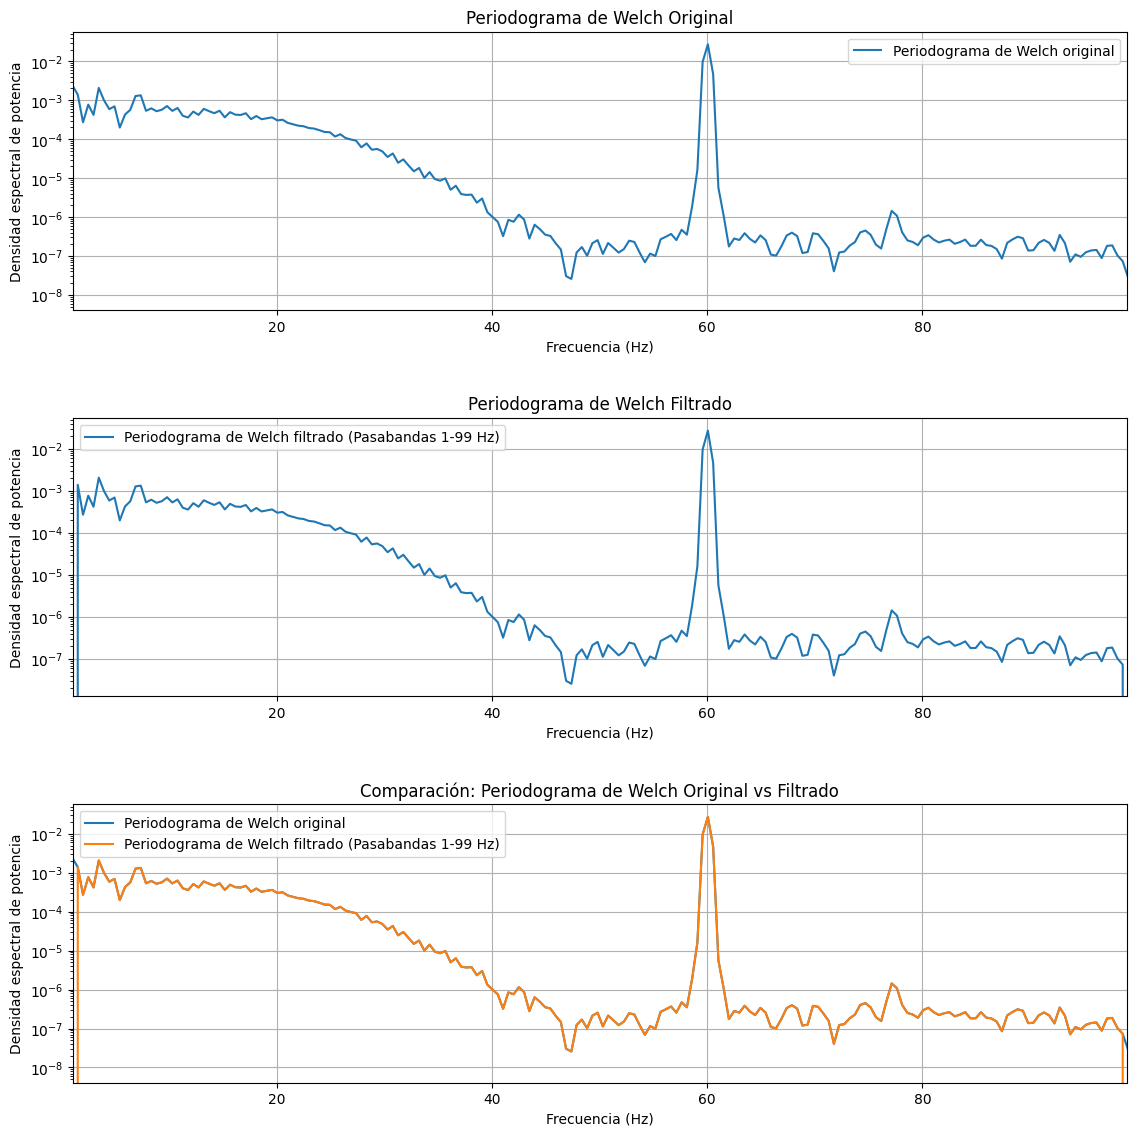

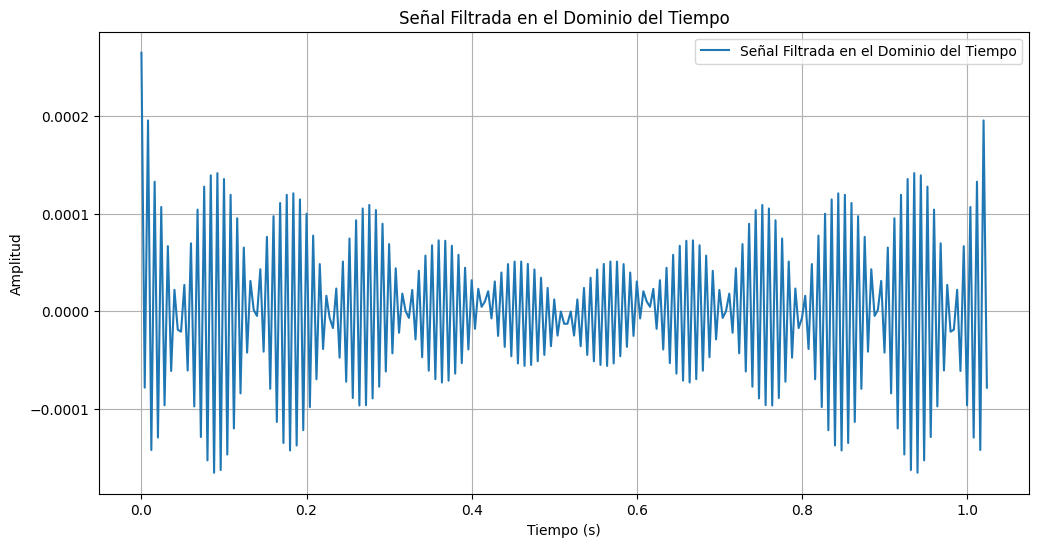

In [16]:
# Calcular la IFFT del periodograma de Welch filtrado para obtener la señal en el dominio del tiempo
filtered_signal = np.fft.ifft(filtered_Pxx_welch)

# Calcular el tiempo para la señal en el dominio del tiempo
t_signal = np.arange(0, len(filtered_signal) / fs, 1 / fs)

# Graficar las tres señales en subgráficos separados
plt.figure(figsize=(12, 12))

# Gráfico 1: Periodograma de Welch original
plt.subplot(311)
plt.semilogy(f_welch, Pxx_welch, label='Periodograma de Welch original')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch Original')
plt.xlim(1, 99)
plt.legend()
plt.grid(True)


plt.tight_layout(pad=3.0)

# Gráfico 2: Periodograma de Welch filtrado
plt.subplot(312)
plt.semilogy(f_welch, filtered_Pxx_welch, label='Periodograma de Welch filtrado (Pasabandas 1-99 Hz)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch Filtrado')
plt.xlim(1, 99)  # Limitar el eje x de 1 a 99 Hz
plt.legend()
plt.grid(True)

plt.tight_layout(pad=3.0)

# Gráfico 3: Comparación del periodograma de Welch original y filtrado
plt.subplot(313)
plt.semilogy(f_welch, Pxx_welch, label='Periodograma de Welch original')
plt.semilogy(f_welch, filtered_Pxx_welch, label='Periodograma de Welch filtrado (Pasabandas 1-99 Hz)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.title('Comparación: Periodograma de Welch Original vs Filtrado')
plt.xlim(1, 99)  # Limitar el eje x de 1 a 99 Hz
plt.legend()
plt.grid(True)


plt.tight_layout(pad=3.0)

plt.show()

# Graficar la señal filtrada en el dominio del tiempo y compararla con el periodograma de Welch filtrado
plt.figure(figsize=(12, 6))

# Graficar la señal filtrada en el dominio del tiempo
plt.plot(t_signal, np.real(filtered_signal), label='Señal Filtrada en el Dominio del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal Filtrada en el Dominio del Tiempo')
plt.legend()
plt.grid(True)
plt.show()

Seleccionamos el solapamiento y el ancho de la ventana para el periodograma de Welch considerando que ambos están relacionados con la resolución en frecuencia y tiempo en la transformada de Fourier de corto tiempo (STFT). El solapamiento influye en la resolución temporal (un mayor solapamiento mejora la resolución temporal pero aumenta la varianza), mientras que el tamaño de la ventana afecta la resolución en frecuencia (una ventana más amplia mejora la resolución en frecuencia pero reduce la resolución temporal). La elección de estos parámetros depende de las características particulares de la señal y del tipo de análisis que se quiera realizar

4.6 Realice un análisis de frecuencia a través del periodograma de welch de una señal de EEG de un paciente Sano y otra de un paciente con Parkinson de algún canal que en el proyecto 1 hayan identificado que presentaba diferencias, si no encontró diferencias, elija un par al azar. Realice un análisis comparativo de las señales según lo que le indiquen los periodogramas. (Usar una ventana Hanning, y justificar la elección del solapamiento y el ancho de la ventana)

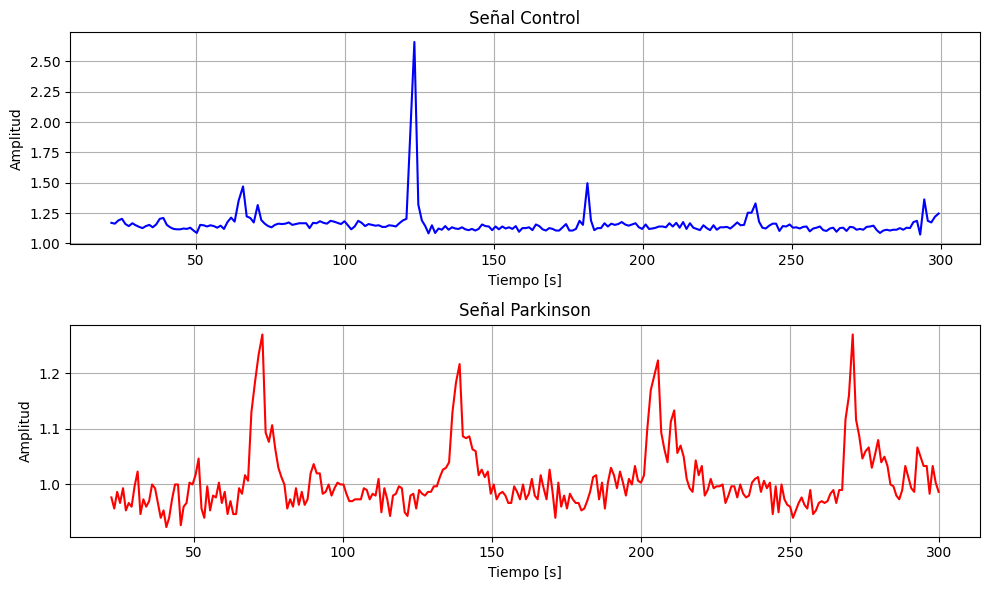

In [27]:
def leer_archivo_ts(filename):
    datos = np.loadtxt(filename)  # Carga el archivo como un array numpy
    tiempo = datos[:, 0]  # Primera columna: tiempo
    señal = datos[:, 1]   # Segunda columna: señal
    return tiempo, señal

# Leer ambos archivos
tiempo_control, señal_control = leer_archivo_ts('control2.ts')
tiempo_park, señal_park = leer_archivo_ts('park2.ts')

# Graficar ambas señales
plt.figure(figsize=(10, 6))

# Señal de control
plt.subplot(2, 1, 1)
plt.plot(tiempo_control, señal_control, label="Control", color='b')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Señal Control')
plt.grid(True)

# Señal de park
plt.subplot(2, 1, 2)
plt.plot(tiempo_park, señal_park, label="Park", color='r')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Señal Parkinson')
plt.grid(True)

plt.tight_layout()
plt.show()


In [28]:
ecg_length = len(señal_control)
nperseg_value = min(ecg_length, 512)
noverlap_value = min(nperseg_value // 2, ecg_length - 1)

f_welch_c, Pxx_welch_c = welch(señal_control.flatten(), fs=fs, window='hann', nperseg=nperseg_value, noverlap=noverlap_value)

ecg_length = len(señal_park)
nperseg_value = min(ecg_length, 512)
noverlap_value = min(nperseg_value // 2, ecg_length - 1)

f_welch_p, Pxx_welch_p = welch(señal_park.flatten(), fs=fs, window='hann', nperseg=nperseg_value, noverlap=noverlap_value)

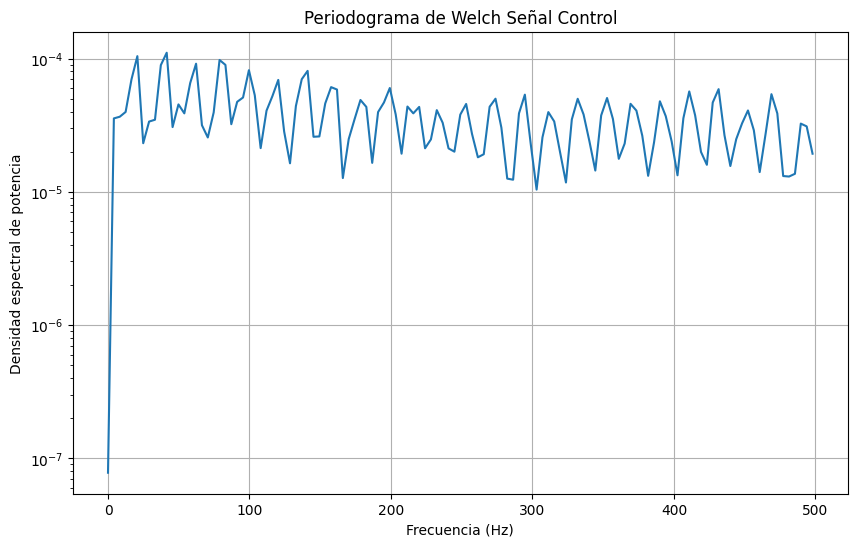

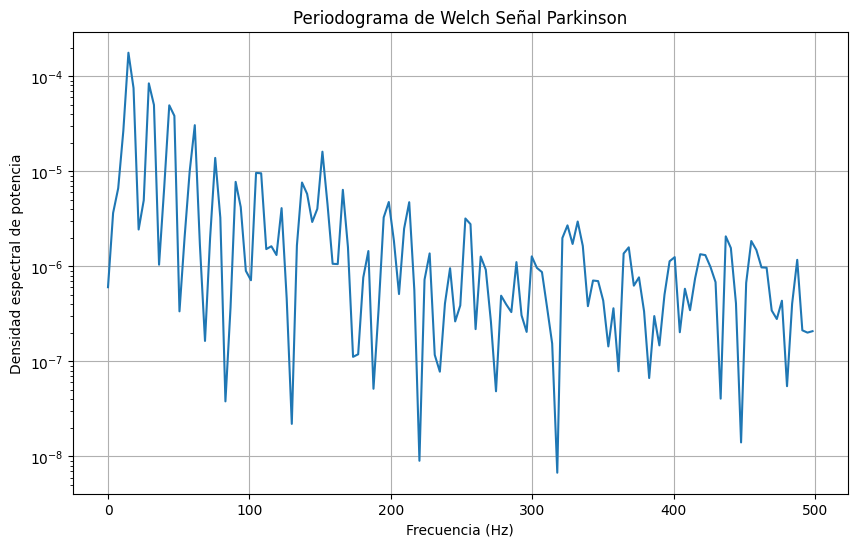

In [29]:
# Graficar el periodograma de Welch control
plt.figure(figsize=(10, 6))
plt.semilogy(f_welch_c, Pxx_welch_c)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch Señal Control')
plt.grid(True)
plt.show()


# Graficar el periodograma de Welch Parkinson
plt.figure(figsize=(10, 6))
plt.semilogy(f_welch_p, Pxx_welch_p)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch Señal Parkinson')
plt.grid(True)
plt.show()


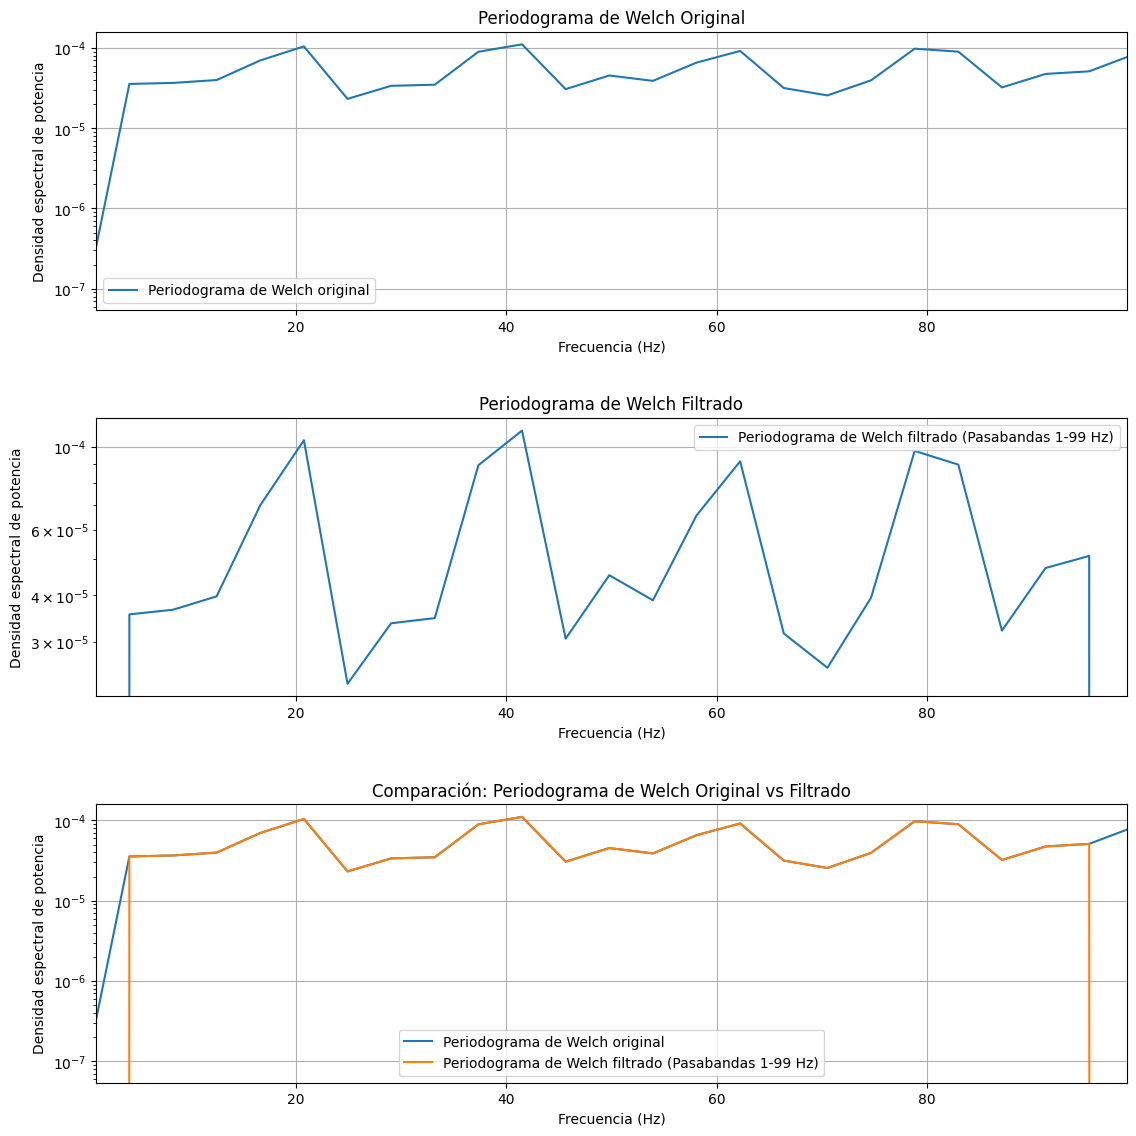

In [31]:
# Aplicar un filtro similar al del punto 4.4 al periodograma de Welch para control
filtered_Pxx_welch_c = Pxx_welch_c.copy()
filtered_Pxx_welch_c[(f_welch_c < 1) | (f_welch_c > 99)] = 0

# Graficar las tres señales en subgráficos separados
plt.figure(figsize=(12, 12))

# Gráfico 1: Periodograma de Welch original
plt.subplot(311)
plt.semilogy(f_welch_c, Pxx_welch_c, label='Periodograma de Welch original')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch Original')
plt.xlim(1, 99)  # Limitar el eje x de 1 a 99 Hz
plt.legend()
plt.grid(True)


plt.tight_layout(pad=3.0)

# Gráfico 2: Periodograma de Welch filtrado
plt.subplot(312)
plt.semilogy(f_welch_c, filtered_Pxx_welch_c, label='Periodograma de Welch filtrado (Pasabandas 1-99 Hz)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch Filtrado')
plt.xlim(1, 99)  # Limitar el eje x de 1 a 99 Hz
plt.legend()
plt.grid(True)


plt.tight_layout(pad=3.0)

# Gráfico 3: Comparación del periodograma de Welch original y filtrado
plt.subplot(313)
plt.semilogy(f_welch_c, Pxx_welch_c, label='Periodograma de Welch original')
plt.semilogy(f_welch_c, filtered_Pxx_welch_c, label='Periodograma de Welch filtrado (Pasabandas 1-99 Hz)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.title('Comparación: Periodograma de Welch Original vs Filtrado')
plt.xlim(1, 99)  # Limitar el eje x de 1 a 99 Hz
plt.legend()
plt.grid(True)


plt.tight_layout(pad=3.0)

plt.show()


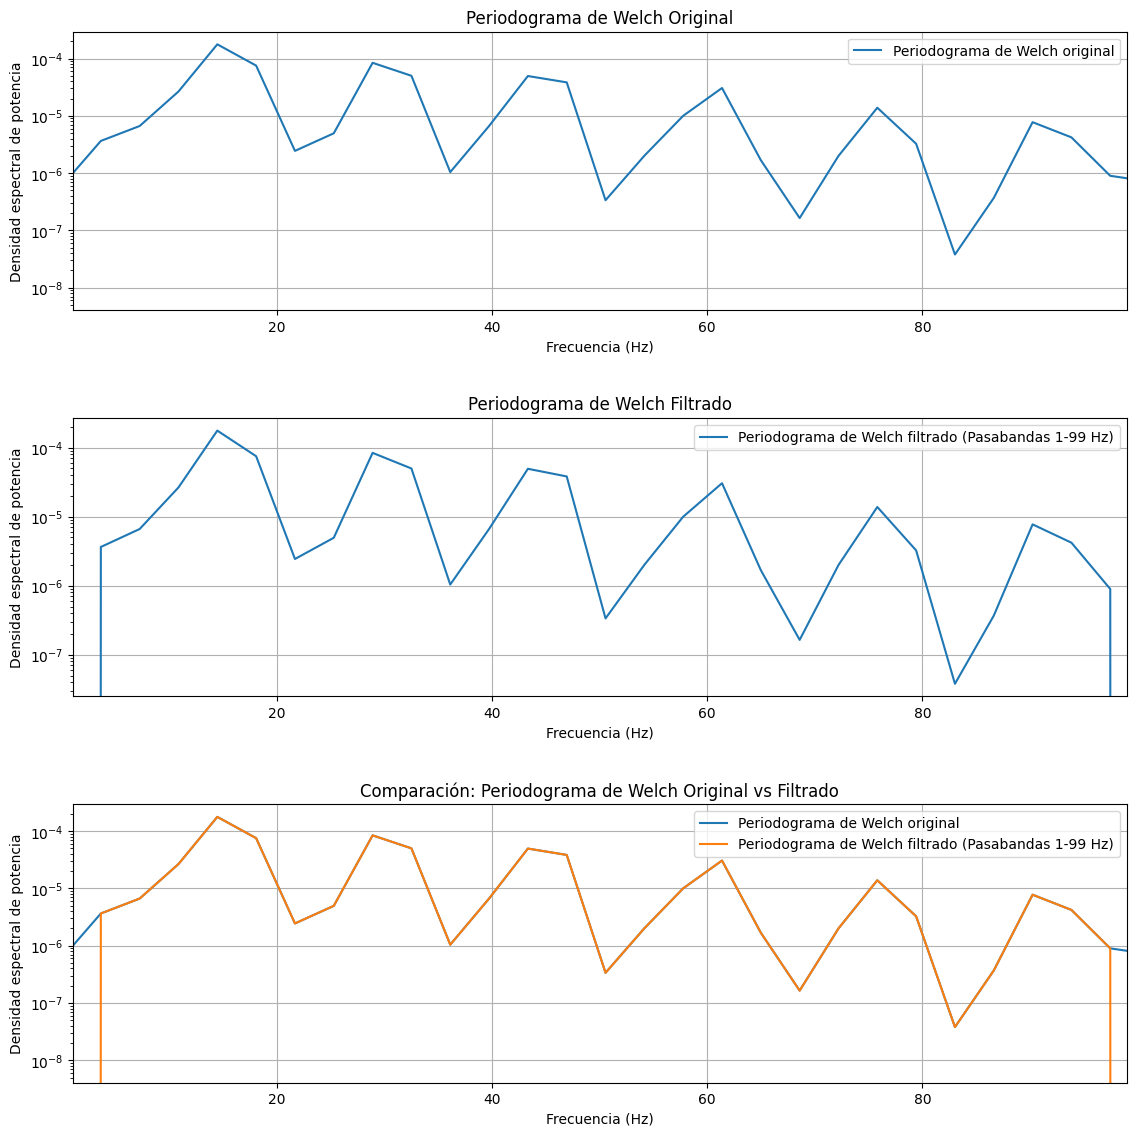

In [32]:
# Aplicar un filtro similar al del punto 4.4 al periodograma de Welch para parkinson
filtered_Pxx_welch_p = Pxx_welch_p.copy()
filtered_Pxx_welch_p[(f_welch_p < 1) | (f_welch_p > 99)] = 0

# Graficar las tres señales en subgráficos separados
plt.figure(figsize=(12, 12))

# Gráfico 1: Periodograma de Welch original
plt.subplot(311)
plt.semilogy(f_welch_p, Pxx_welch_p, label='Periodograma de Welch original')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch Original')
plt.xlim(1, 99)  # Limitar el eje x de 1 a 99 Hz
plt.legend()
plt.grid(True)


plt.tight_layout(pad=3.0)

# Gráfico 2: Periodograma de Welch filtrado
plt.subplot(312)
plt.semilogy(f_welch_p, filtered_Pxx_welch_p, label='Periodograma de Welch filtrado (Pasabandas 1-99 Hz)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch Filtrado')
plt.xlim(1, 99)  # Limitar el eje x de 1 a 99 Hz
plt.legend()
plt.grid(True)


plt.tight_layout(pad=3.0)

# Gráfico 3: Comparación del periodograma de Welch original y filtrado
plt.subplot(313)
plt.semilogy(f_welch_p, Pxx_welch_p, label='Periodograma de Welch original')
plt.semilogy(f_welch_p, filtered_Pxx_welch_p, label='Periodograma de Welch filtrado (Pasabandas 1-99 Hz)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.title('Comparación: Periodograma de Welch Original vs Filtrado')
plt.xlim(1, 99)  # Limitar el eje x de 1 a 99 Hz
plt.legend()
plt.grid(True)


plt.tight_layout(pad=3.0)

plt.show()


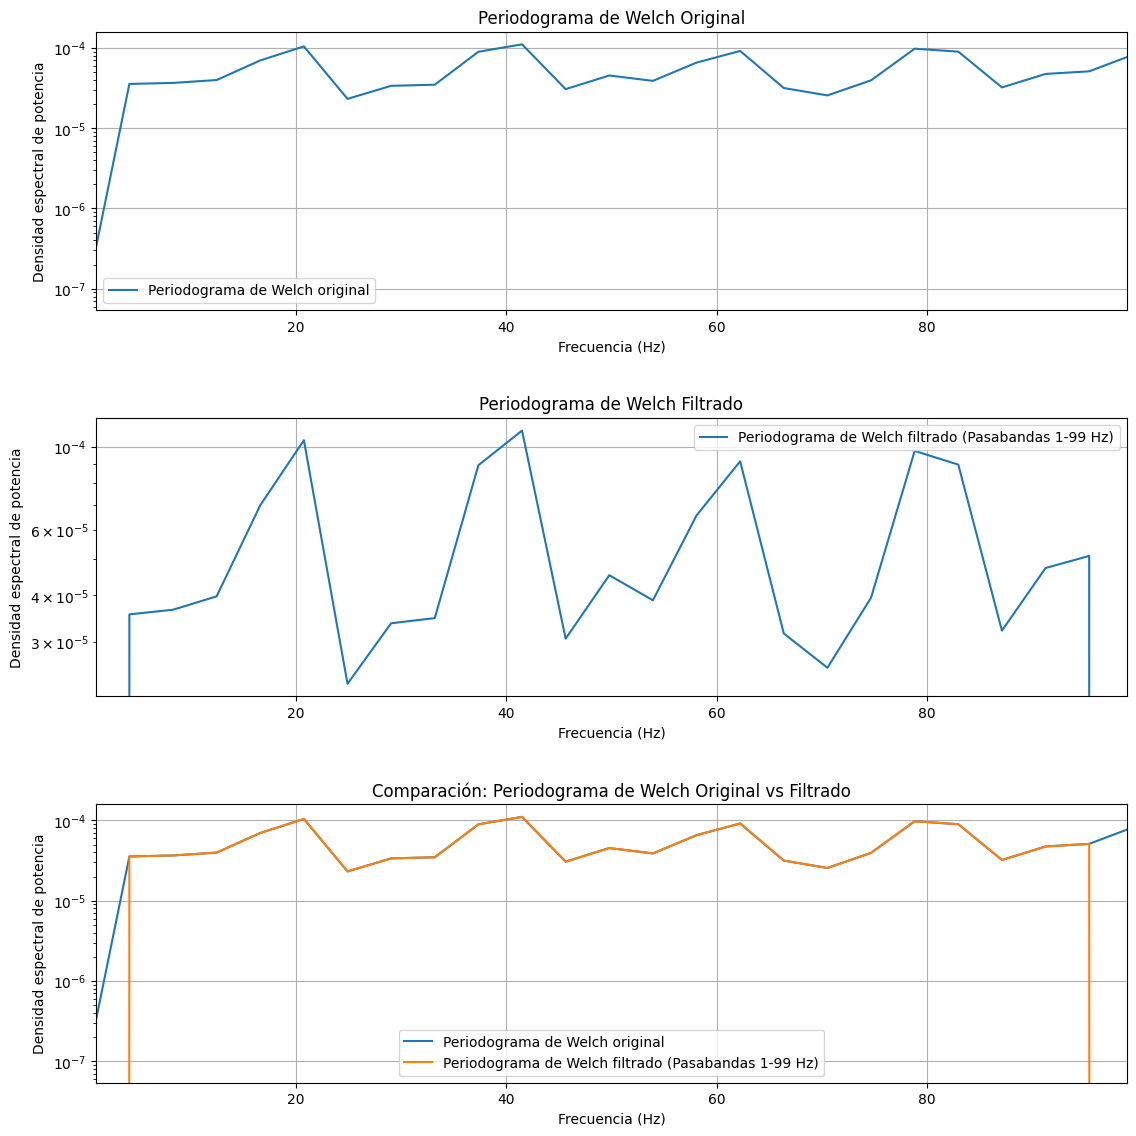

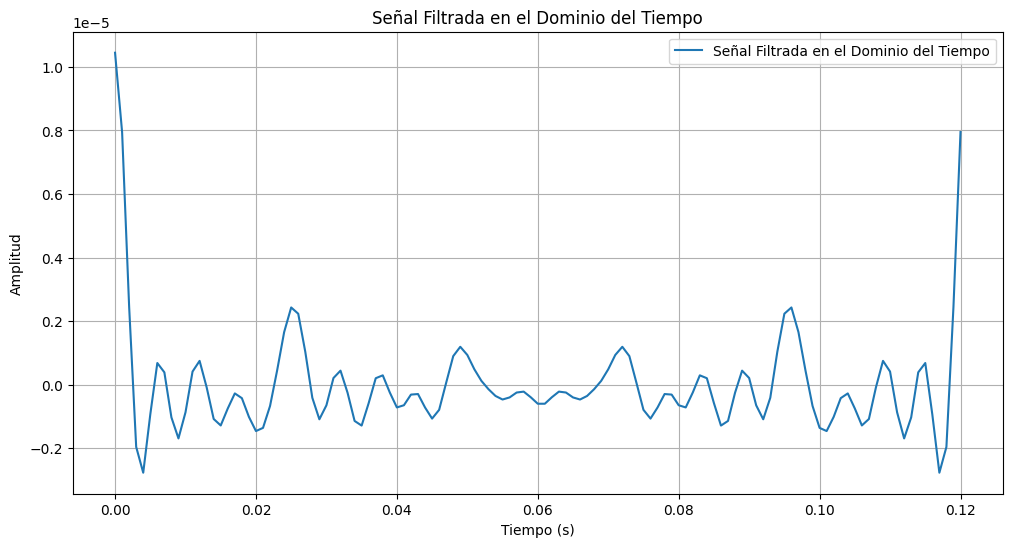

In [33]:
# Calcular la IFFT del periodograma de Welch filtrado para obtener la señal en el dominio del tiempo Señal Control
filtered_signal = np.fft.ifft(filtered_Pxx_welch_c)

# Calcular el tiempo para la señal en el dominio del tiempo
t_signal = np.arange(0, len(filtered_signal) / fs, 1 / fs)

# Graficar las tres señales en subgráficos separados
plt.figure(figsize=(12, 12))

# Gráfico 1: Periodograma de Welch original
plt.subplot(311)
plt.semilogy(f_welch_c, Pxx_welch_c, label='Periodograma de Welch original')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch Original')
plt.xlim(1, 99)
plt.legend()
plt.grid(True)


plt.tight_layout(pad=3.0)

# Gráfico 2: Periodograma de Welch filtrado
plt.subplot(312)
plt.semilogy(f_welch_c, filtered_Pxx_welch_c, label='Periodograma de Welch filtrado (Pasabandas 1-99 Hz)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch Filtrado')
plt.xlim(1, 99)  # Limitar el eje x de 1 a 99 Hz
plt.legend()
plt.grid(True)

plt.tight_layout(pad=3.0)

# Gráfico 3: Comparación del periodograma de Welch original y filtrado
plt.subplot(313)
plt.semilogy(f_welch_c, Pxx_welch_c, label='Periodograma de Welch original')
plt.semilogy(f_welch_c, filtered_Pxx_welch_c, label='Periodograma de Welch filtrado (Pasabandas 1-99 Hz)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.title('Comparación: Periodograma de Welch Original vs Filtrado')
plt.xlim(1, 99)  # Limitar el eje x de 1 a 99 Hz
plt.legend()
plt.grid(True)


plt.tight_layout(pad=3.0)

plt.show()

# Graficar la señal filtrada en el dominio del tiempo y compararla con el periodograma de Welch filtrado
plt.figure(figsize=(12, 6))

# Graficar la señal filtrada en el dominio del tiempo
plt.plot(t_signal, np.real(filtered_signal), label='Señal Filtrada en el Dominio del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal Filtrada en el Dominio del Tiempo')
plt.legend()
plt.grid(True)
plt.show()

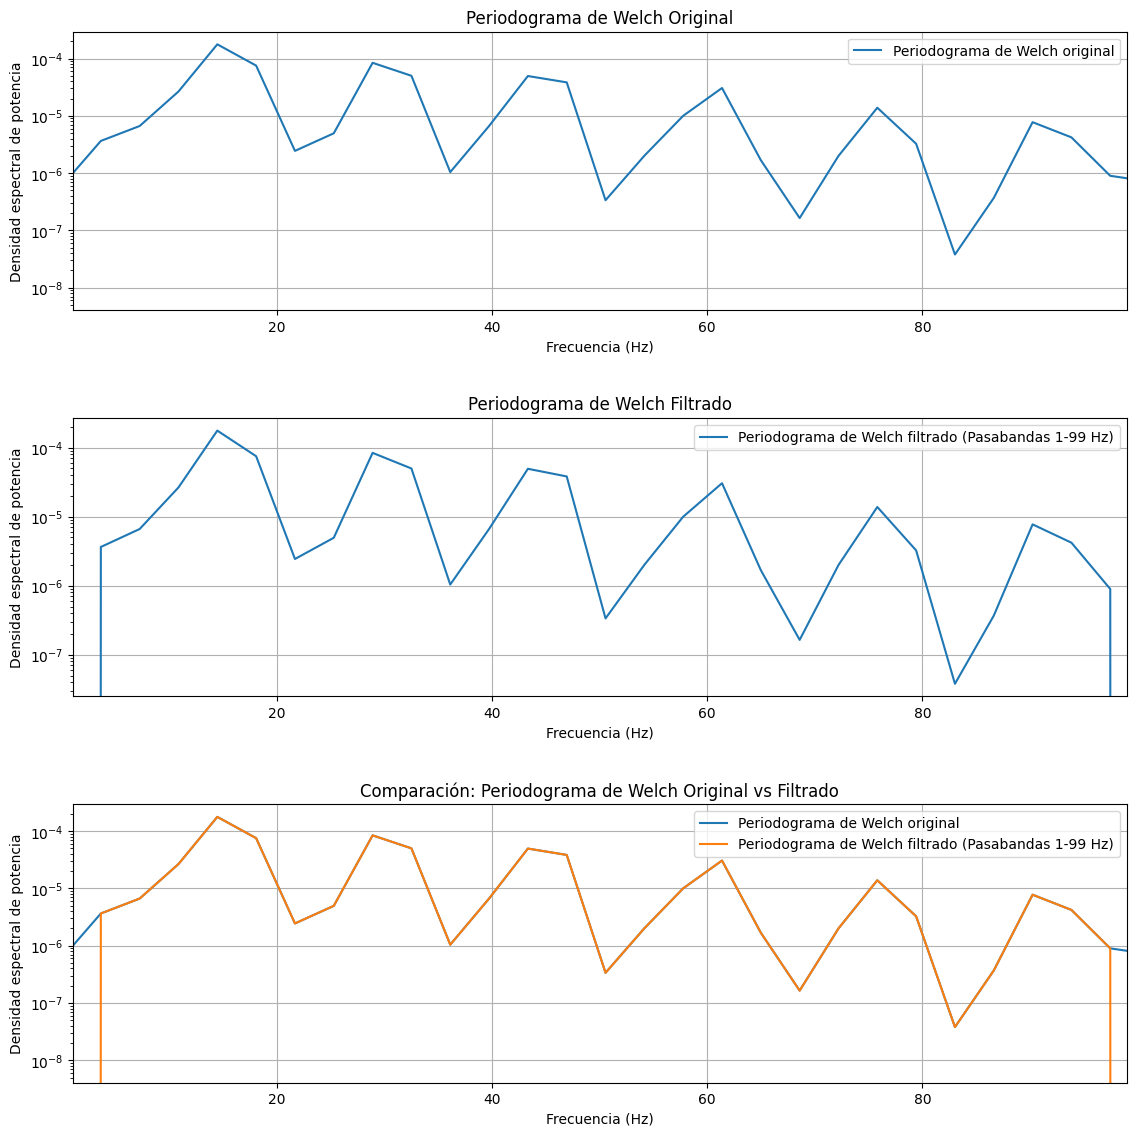

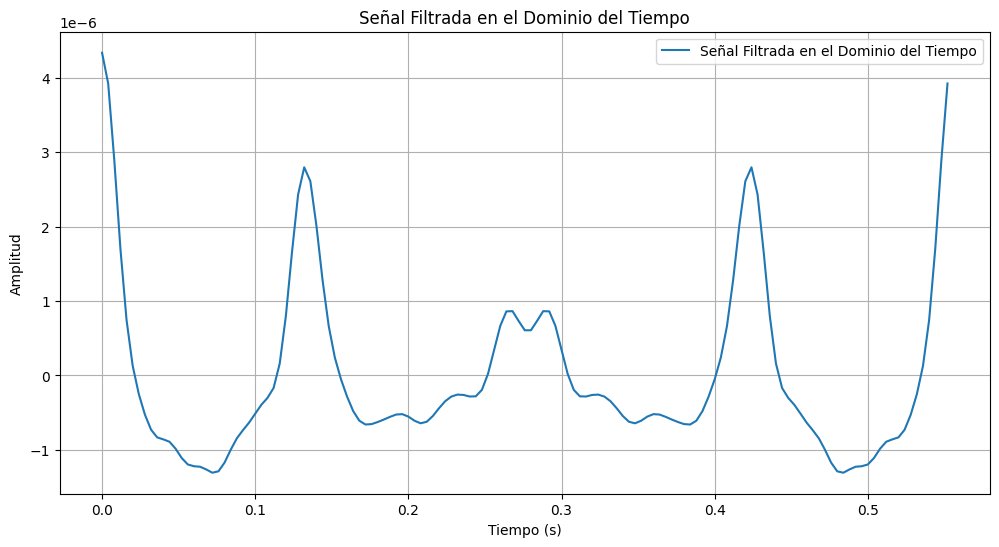

In [53]:
# Calcular la IFFT del periodograma de Welch filtrado para obtener la señal en el dominio del tiempo Señal Control
filtered_signal = np.fft.ifft(filtered_Pxx_welch_p)

# Calcular el tiempo para la señal en el dominio del tiempo
t_signal = np.arange(0, len(filtered_signal) / fs, 1 / fs)

# Graficar las tres señales en subgráficos separados
plt.figure(figsize=(12, 12))

# Gráfico 1: Periodograma de Welch original
plt.subplot(311)
plt.semilogy(f_welch_p, Pxx_welch_p, label='Periodograma de Welch original')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch Original')
plt.xlim(1, 99)
plt.legend()
plt.grid(True)


plt.tight_layout(pad=3.0)

# Gráfico 2: Periodograma de Welch filtrado
plt.subplot(312)
plt.semilogy(f_welch_p, filtered_Pxx_welch_p, label='Periodograma de Welch filtrado (Pasabandas 1-99 Hz)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch Filtrado')
plt.xlim(1, 99)  # Limitar el eje x de 1 a 99 Hz
plt.legend()
plt.grid(True)

plt.tight_layout(pad=3.0)

# Gráfico 3: Comparación del periodograma de Welch original y filtrado
plt.subplot(313)
plt.semilogy(f_welch_p, Pxx_welch_p, label='Periodograma de Welch original')
plt.semilogy(f_welch_p, filtered_Pxx_welch_p, label='Periodograma de Welch filtrado (Pasabandas 1-99 Hz)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.title('Comparación: Periodograma de Welch Original vs Filtrado')
plt.xlim(1, 99)  # Limitar el eje x de 1 a 99 Hz
plt.legend()
plt.grid(True)


plt.tight_layout(pad=3.0)

plt.show()

# Graficar la señal filtrada en el dominio del tiempo y compararla con el periodograma de Welch filtrado
plt.figure(figsize=(12, 6))

# Graficar la señal filtrada en el dominio del tiempo
plt.plot(t_signal, np.real(filtered_signal), label='Señal Filtrada en el Dominio del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal Filtrada en el Dominio del Tiempo')
plt.legend()
plt.grid(True)
plt.show()

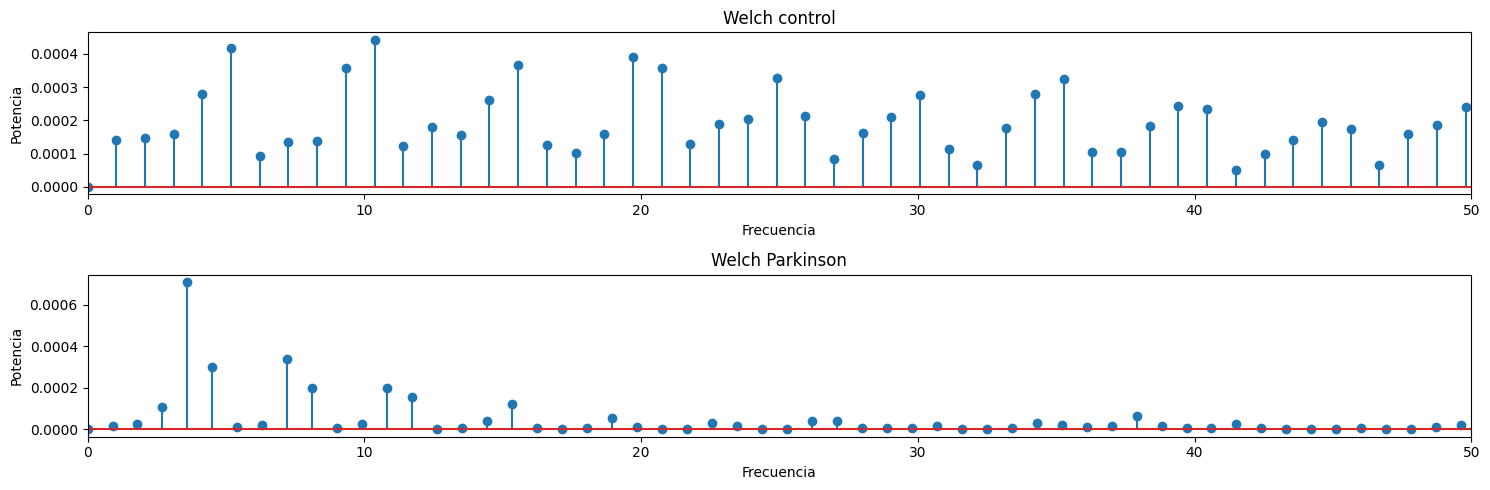

In [51]:
#welch
# from scipy.signal import welch as pwelch

ecg_length = len(señal_control)
nperseg_value_c = min(ecg_length, 512)
noverlap_value_c = min(nperseg_value // 2, ecg_length - 1)
ecg_length = len(señal_park)
nperseg_value_p = min(ecg_length, 512)
noverlap_value_p = min(nperseg_value // 2, ecg_length - 1)
nperseg=2000 #ancho de ventana. usado en literatura 1-2 seg
noverlap=int(nperseg/2) #solapamiento de las ventanas. en literatura se suele usar 50-75%
f_control, Pxx_control =pwelch(señal_control, fs, 'hann', nperseg_value_c, noverlap_value_c) #hann = hanning o Hamming?
f_parkinson, Pxx_parkinson =pwelch(señal_park, fs, 'hann', nperseg_value_p, noverlap_value_p)
plt.figure(figsize=(15,5))
plt.subplot(211)
plt.stem(f_control,Pxx_control)
plt.title('Welch control')
plt.xlabel('Frecuencia')
plt.ylabel('Potencia')
plt.xlim([0,50])
#plt.ylim([0,1.5])
plt.subplot(212)
plt.stem(f_parkinson,Pxx_parkinson)
plt.title('Welch Parkinson')
plt.xlabel('Frecuencia')
plt.ylabel('Potencia')
plt.xlim([0,50])
#plt.ylim([0,1.5])
plt.tight_layout()


El periodograma de Welch presenta de manera clara la densidad espectral de potencia  de la señal en el dominio de la frecuencia, permitiendo observar, analizar y concluir sobre la mayor actividad de la señal para obtener los argumentos necesarios en tomas de decisiones y predicciones sobre la enfermedad como el Parkinson, por ejemplo ya que permite observar en que frecuencias disminuye significativamente la actividad cerebral
Se conoce en la literatura que en el análisis espectral del ECG en pacientes con parkinson se presenta una disminución significativa en frecuencias rapidas, es decir en Alpha (8-12Hz), Beta(12-30Hz) y Gamma (30-100Hz) a diferencia de las frecuencias lentas presenta un aumento en la potencia [3], en conclución de nuestro estudio podemos afirmar la disminución en las frecuencias rapidas,esto era de esperarse ya que los datos elegidos para el sujeto con parkinson presento una diferencia siginificativa en la variable de la zancada del pie izuierdo, un parametro importante a considerar en esta enfermedad, en cuanto al aumento de la potencia en las frecuencias bajas no fue tan alto pero si presentó un pico significativo en una frecuencia baja.


### Conclusiones
1. La Transformada de Fourier es fundamental para analizar señales en el dominio de la frecuencia, esto al permitir descomponer señales complejas en una suma de señales sinusoidales de distintas frecuencias, lo cual es esencial para identificar las frecuencias dominantes presentes en una señal, facilitando tareas como la detección de ruido, identificación de patrones periódicos y análisis del espectro. 

2. Con la Transformada Inversa de Fourier, que es un proceso que convierte los datos del dominio de la frecuencia al dominio del tiempo, recuperarando la señal original, es crucial cuando aplicamos técnicas de filtrado en el dominio de la frecuencia, como la eliminación de ruido o la reducción de interferencias, y cuando necesitamos retornar al dominio temporal para analizar o procesar la señal modificada.

3. El periodograma de Welch es una herramienta que ayuda a estimar el espectro de potencia de una señal, al dividir la señal en segmentos superpuestos y promediar los espectros de estos segmentos, lo que permite una mejor visualización de las frecuencias presentes en la señal.

4. La combinación de estas herramientas permite un análisis avanzado y completo de señales,ayudando a detectar las frecuencias presentes en la señal, estimar el espectro de señales ruidosas, eliminar o conservar ciertas frecuencias de interés, y la posibilidad de regresar al dominio temporal para continuar el análisis o la reconstrucción de la señal procesada.

Bibliografía:


[1].  “Discrete Fourier Transform (numpy.fft) — NumPy v2.1 Manual”. NumPy -. Accedido el 14 de octubre de 2024. [En línea]. Disponible: https://numpy.org/doc/stable/reference/routines.fft.html

[2].  “numpy.fft.ifft — NumPy v2.0 Manual”. NumPy -. Accedido el 14 de octubre de 2024. [En línea]. Disponible: https://numpy.org/doc/2.0/reference/generated/numpy.fft.ifft.html

[3]. Carmona J., Tobon C., Pineda D. 2018. Marcadores electroencefalograficos y fenotipo cognitivo en la enfermedad de parkinson: una revision sistematica. https://www.revistamedicina.net/index.php/Medicina/article/download/1371/1677?inline=1 


